In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


### Historical_Wildfires.csv
For now, I will isolate the y_target, 'Estimated_fire_area' in order to see how many missing values we have on our dependant variable.

In [2]:
wildfires = pd.read_csv('Historical_wildfires.csv')
wildfires['Date'] = pd.to_datetime(wildfires['Date'])
wildfires = pd.pivot(wildfires, index = 'Date', columns = 'Region', values = 'Estimated_fire_area')

In [3]:
wildfires.reset_index(inplace=True)
print('# of rows must equal :', len(pd.date_range(start = '2005-01-01', end = '2020-10-31')))
wildfires

# of rows must equal : 5783


Region,Date,NSW,NT,QL,SA,TA,VI,WA
0,2005-01-01,NaN,4.945000,38.831579,NaN,NaN,NaN,36.382500
1,2005-01-02,NaN,1.320000,64.464286,NaN,NaN,2.8,148.106471
2,2005-01-03,NaN,88.740000,47.386585,NaN,NaN,1.0,60.632258
3,2005-01-04,8.68000,NaN,30.100000,NaN,NaN,NaN,86.374167
4,2005-01-05,16.61125,NaN,4.000000,NaN,NaN,NaN,31.378947
...,...,...,...,...,...,...,...,...
5777,2020-10-27,1.21000,12.750000,78.670769,NaN,NaN,NaN,32.970000
5778,2020-10-28,3.00000,144.990566,119.608649,NaN,NaN,2.0,20.840625
5779,2020-10-29,NaN,53.462326,249.090625,NaN,NaN,NaN,136.083077
5780,2020-10-30,1.32000,171.325280,282.538983,NaN,NaN,2.0,42.397895


In [4]:
# Instantiating another dataframe with a daterange and merge to find the missing date.
dummy = pd.DataFrame()
dummy['Date'] = pd.date_range(start = '2005-01-01', end = '2020-10-31')

# 2020-03-06 have missing values for all 7 states.
wildfires = pd.merge(wildfires, dummy, how = 'outer')
wildfires.set_index('Date', inplace=True)
wildfires.sort_index(inplace=True)
# wildfires

In [5]:
wildfires.fillna(1, inplace = True)
wildfires.reset_index(inplace=True)
# wildfires

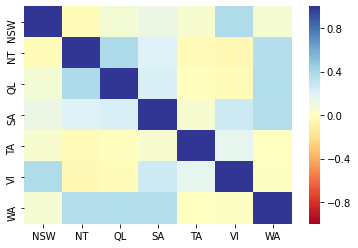

In [6]:
sns.heatmap(wildfires.corr(),vmin=-1, vmax=1, cmap = 'RdYlBu')

In [7]:
columns = ['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA']

In [8]:
import holidays
au_holidays = holidays.CountryHoliday('AU', years = list(range(2005,2021)))

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import datetime

In [10]:
wildfires.set_index('Date',inplace=True)

In [11]:
_queensland = wildfires[['NT']]
_queensland

,NT
Date,
2005-01-01,4.945000
2005-01-02,1.320000
2005-01-03,88.740000
2005-01-04,1.000000
2005-01-05,1.000000
...,...
2020-10-27,12.750000
2020-10-28,144.990566
2020-10-29,53.462326


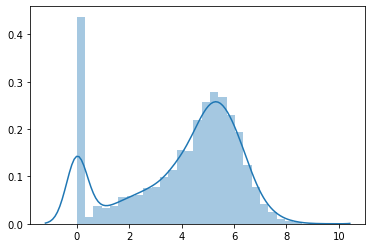

In [12]:
sns.distplot(np.log(_queensland))

In [13]:
_queens_log = _queensland.copy(deep=True)
_queens_log['NT'] = np.log(_queens_log['NT'])

In [14]:
weather = pd.read_csv('HistoricalWeather.csv')
weather.columns = ['Date', 'Region', 'Parameter', 'count', 'min', 'max', 'mean', 'variance']
weather['Date'] = pd.to_datetime(weather['Date'])
weather

,Date,Region,Parameter,count,min,max,mean,variance
0,2005-01-01,NSW,Precipitation,8.002343e+05,0.000000,1.836935,0.044274,0.028362
1,2005-01-01,NSW,RelativeHumidity,8.002343e+05,13.877194,80.522964,36.355567,253.559937
2,2005-01-01,NSW,SoilWaterContent,8.002343e+05,0.002245,0.414305,0.170931,0.007758
3,2005-01-01,NSW,SolarRadiation,8.002343e+05,14.515009,32.169781,26.749389,6.078587
4,2005-01-01,NSW,Temperature,8.002343e+05,14.485785,35.878704,27.341182,18.562212
...,...,...,...,...,...,...,...,...
242776,2020-10-31,WA,RelativeHumidity,2.528546e+06,9.272744,82.022224,34.193973,309.018764
242777,2020-10-31,WA,SoilWaterContent,2.528546e+06,0.000000,0.285399,0.050737,0.001419
242778,2020-10-31,WA,SolarRadiation,2.528546e+06,17.072290,29.743744,26.746413,5.986063
242779,2020-10-31,WA,Temperature,2.528546e+06,16.238239,34.669132,28.090392,15.293953


In [15]:
weather = weather.loc[weather['Region'].eq('NT')]
weather

,Date,Region,Parameter,count,min,max,mean,variance
6,2005-01-01,NT,Precipitation,1.357561e+06,0.000000,315.266815,9.884958,546.059262
7,2005-01-01,NT,RelativeHumidity,1.357561e+06,14.558820,95.683342,61.494675,584.201131
8,2005-01-01,NT,SoilWaterContent,1.357561e+06,0.000000,0.496140,0.167735,0.026743
9,2005-01-01,NT,SolarRadiation,1.357561e+06,2.518120,31.634459,19.781791,58.942658
10,2005-01-01,NT,Temperature,1.357561e+06,24.179960,38.136787,29.881492,12.920252
...,...,...,...,...,...,...,...,...
242746,2020-10-31,NT,RelativeHumidity,1.357561e+06,10.292431,78.627213,27.439472,244.379596
242747,2020-10-31,NT,SoilWaterContent,1.357561e+06,0.000000,0.328900,0.068836,0.004214
242748,2020-10-31,NT,SolarRadiation,1.357561e+06,22.582127,30.207880,28.753237,2.531528
242749,2020-10-31,NT,Temperature,1.357561e+06,20.816809,34.729530,28.483307,11.273161


In [16]:
weather_pivot = pd.pivot(weather, index=['Date'], columns = ['Parameter'], values = ['min', 'max','mean', 'variance'])
weather_pivot

min                                                   \
Parameter  Precipitation RelativeHumidity SoilWaterContent SolarRadiation   
Date                                                                        
2005-01-01           0.0        14.558820     0.000000e+00       2.518120   
2005-01-02           0.0        24.545588     5.487818e-07       3.624103   
2005-01-03           0.0        26.324978     0.000000e+00       2.609383   
2005-01-04           0.0        17.972591     4.041164e-07       5.795825   
2005-01-05           0.0        12.375551     8.472707e-07       5.025146   
...                  ...              ...              ...            ...   
2020-10-27           0.0        14.552748     2.327530e-07      17.342916   
2020-10-28           0.0         9.955595     0.000000e+00      20.547968   
2020-10-29           0.0         9.798850     0.000000e+00      21.640631   
2020-10-30           0.0        10.158679     0.000000e+00      21.662573   
2020-10-31           0.0        10.292431     0.000000e+00      22.582127   

                                           max                   \
Parameter  Temperature WindSpeed Precipitation RelativeHumidity   
Date                                                              
2005-01-01   24.179960  1.840394    315.266815        95.683342   
2005-01-02   24.460094  2.422856     89.898376        93.291039   
2005-01-03   22.853350  2.325922    191.626007        95.732391   
2005-01-04   21.169226  2.570683     80.071053        93.612312   
2005-01-05   19.282555  0.945213     95.759972        89.346535   
...                ...       ...           ...              ...   
2020-10-27   18.360123  0.905769     20.242748        81.196068   
2020-10-28   20.724829  1.005318     25.762955        83.170822   
2020-10-29   22.928164  1.234412      6.900141        78.015366   
2020-10-30   18.294643  1.224854      3.455588        77.691147   
2020-10-31   20.816809  1.305594      2.824485        78.627213   

                                            ...             mean  \
Parameter  SoilWaterContent SolarRadiation  ... SoilWaterContent   
Date                                        ...                    
2005-01-01         0.496140      31.634459  ...         0.167735   
2005-01-02         0.501195      29.250782  ...         0.182831   
2005-01-03         0.495043      30.527388  ...         0.218748   
2005-01-04         0.489537      32.589195  ...         0.242680   
2005-01-05         0.510115      32.729553  ...         0.217265   
...                     ...            ...  ...              ...   
2020-10-27         0.407018      30.461710  ...         0.101788   
2020-10-28         0.425529      30.753054  ...         0.087365   
2020-10-29         0.388768      31.146614  ...         0.077901   
2020-10-30         0.356256      30.646061  ...         0.072682   
2020-10-31         0.328900      30.207880  ...         0.068836   

                                                     variance  \
Parameter  SolarRadiation Temperature WindSpeed Precipitation   
Date                                                            
2005-01-01      19.781791   29.881492  5.296892    546.059262   
2005-01-02      19.321222   28.863760  4.912403    179.241423   
2005-01-03      16.016566   27.429865  4.397652    453.466574   
2005-01-04      18.055125   26.319745  4.789952    241.526326   
2005-01-05      24.227285   26.166425  4.574771     65.908866   
...                   ...         ...       ...           ...   
2020-10-27      26.576084   26.256332  2.927383      3.060416   
2020-10-28      28.060361   27.522400  2.925449      4.106785   
2020-10-29      28.971045   28.782357  3.588450      0.189806   
2020-10-30      29.237004   27.588366  3.789468      0.023468   
2020-10-31      28.753237   28.483307  3.605941      0.006252   

                                                                         \
Parameter  RelativeHumidity SoilWaterContent SolarRadiation Temp

In [17]:
_columns = []
for i,x in weather_pivot.columns:
    _columns.append('{}_{}'.format(i,x))
weather_pivot.columns = _columns

In [18]:
weather_pivot

,min_Precipitation,min_RelativeHumidity,min_SoilWaterContent,min_SolarRadiation,min_Temperature,min_WindSpeed,max_Precipitation,max_RelativeHumidity,max_SoilWaterContent,max_SolarRadiation,...,mean_SoilWaterContent,mean_SolarRadiation,mean_Temperature,mean_WindSpeed,variance_Precipitation,variance_RelativeHumidity,variance_SoilWaterContent,variance_SolarRadiation,variance_Temperature,variance_WindSpeed
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,0.0,14.558820,0.000000e+00,2.518120,24.179960,1.840394,315.266815,95.683342,0.496140,31.634459,...,0.167735,19.781791,29.881492,5.296892,546.059262,584.201131,0.026743,58.942658,12.920252,1.930014
2005-01-02,0.0,24.545588,5.487818e-07,3.624103,24.460094,2.422856,89.898376,93.291039,0.501195,29.250782,...,0.182831,19.321222,28.863760,4.912403,179.241423,350.439419,0.022078,34.117853,7.575619,1.750100
2005-01-03,0.0,26.324978,0.000000e+00,2.609383,22.853350,2.325922,191.626007,95.732391,0.495043,30.527388,...,0.218748,16.016566,27.429865,4.397652,453.466574,194.818209,0.016960,39.498822,3.281991,0.947886
2005-01-04,0.0,17.972591,4.041164e-07,5.795825,21.169226,2.570683,80.071053,93.612312,0.489537,32.589195,...,0.242680,18.055125,26.319745,4.789952,241.526326,511.059176,0.017502,65.400820,4.244213,0.979937
2005-01-05,0.0,12.375551,8.472707e-07,5.025146,19.282555,0.945213,95.759972,89.346535,0.510115,32.729553,...,0.217265,24.227285,26.166425,4.574771,65.908866,533.554030,0.019724,65.321537,5.586288,1.623544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-27,0.0,14.552748,2.327530e-07,17.342916,18.360123,0.905769,20.242748,81.196068,0.407018,30.461710,...,0.101788,26.576084,26.256332,2.927383,3.060416,419.901783,0.007255,11.117159,7.883428,0.810156
2020-10-28,0.0,9.955595,0.000000e+00,20.547968,20.724829,1.005318,25.762955,83.170822,0.425529,30.753054,...,0.087365,28.060361,27.522400,2.925449,4.106785,393.056282,0.006257,8.258142,5.567216,0.583602
2020-10-29,0.0,9.798850,0.000000e+00,21.640631,22.928164,1.234412,6.900141,78.015366,0.388768,31.146614,...,0.077901,28.971045,28.782357,3.588450,0.189806,255.497621,0.005354,3.305882,2.940298,2.085181


In [19]:
_queens_log = pd.concat([_queens_log, weather_pivot], axis=1)

In [20]:
import datetime
date_time = _queens_log.index
timestamp_s = date_time.map(datetime.datetime.timestamp)
day = 24*60*60
_queens_log['year_sin'] = np.sin(timestamp_s * 2 * np.pi / (365.2425 * day))
_queens_log['year_cos'] = np.cos(timestamp_s * 2 * np.pi / (365.2425 * day))

In [21]:
_queens_log

,NT,min_Precipitation,min_RelativeHumidity,min_SoilWaterContent,min_SolarRadiation,min_Temperature,min_WindSpeed,max_Precipitation,max_RelativeHumidity,max_SoilWaterContent,...,mean_Temperature,mean_WindSpeed,variance_Precipitation,variance_RelativeHumidity,variance_SoilWaterContent,variance_SolarRadiation,variance_Temperature,variance_WindSpeed,year_sin,year_cos
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-01,1.598377,0.0,14.558820,0.000000e+00,2.518120,24.179960,1.840394,315.266815,95.683342,0.496140,...,29.881492,5.296892,546.059262,584.201131,0.026743,58.942658,12.920252,1.930014,0.012400,0.999923
2005-01-02,0.277632,0.0,24.545588,5.487818e-07,3.624103,24.460094,2.422856,89.898376,93.291039,0.501195,...,28.863760,4.912403,179.241423,350.439419,0.022078,34.117853,7.575619,1.750100,0.029599,0.999562
2005-01-03,4.485711,0.0,26.324978,0.000000e+00,2.609383,22.853350,2.325922,191.626007,95.732391,0.495043,...,27.429865,4.397652,453.466574,194.818209,0.016960,39.498822,3.281991,0.947886,0.046789,0.998905
2005-01-04,0.000000,0.0,17.972591,4.041164e-07,5.795825,21.169226,2.570683,80.071053,93.612312,0.489537,...,26.319745,4.789952,241.526326,511.059176,0.017502,65.400820,4.244213,0.979937,0.063965,0.997952
2005-01-05,0.000000,0.0,12.375551,8.472707e-07,5.025146,19.282555,0.945213,95.759972,89.346535,0.510115,...,26.166425,4.574771,65.908866,533.554030,0.019724,65.321537,5.586288,1.623544,0.081122,0.996704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-27,2.545531,0.0,14.552748,2.327530e-07,17.342916,18.360123,0.905769,20.242748,81.196068,0.407018,...,26.256332,2.927383,3.060416,419.901783,0.007255,11.117159,7.883428,0.810156,-0.900812,0.434210
2020-10-28,4.976669,0.0,9.955595,0.000000e+00,20.547968,20.724829,1.005318,25.762955,83.170822,0.425529,...,27.522400,2.925449,4.106785,393.056282,0.006257,8.258142,5.567216,0.583602,-0.893209,0.449641
2020-10-29,3.978977,0.0,9.798850,0.000000e+00,21.640631,22.928164,1.234412,6.900141,78.015366,0.388768,...,28.782357,3.588450,0.189806,255.497621,0.005354,3.305882,2.940298,2.085181,-0.885342,0.464940


In [22]:
vegetation = pd.read_csv('VegetationIndex.csv')
vegetation = vegetation.loc[vegetation['Region'].eq('NT')]
vegetation['Date'] = pd.to_datetime(vegetation['Date'])
vegetation

,Region,Date,Vegetation_index_mean,Vegetation_index_max,Vegetation_index_min,Vegetation_index_std,Vegetation_index_variance
190,NT,2005-01-01,0.300478,0.9986,-0.2,0.152621,0.023293
191,NT,2005-02-01,0.308120,0.9948,-0.2,0.164542,0.027074
192,NT,2005-03-01,0.301442,0.9853,-0.2,0.159997,0.025599
193,NT,2005-04-01,0.285698,0.9924,-0.2,0.144754,0.020954
194,NT,2005-05-01,0.266351,0.9805,-0.2,0.124132,0.015409
...,...,...,...,...,...,...,...
375,NT,2020-06-01,0.280739,0.9879,-0.2,0.124939,0.015610
376,NT,2020-07-01,0.264257,0.9976,-0.2,0.109338,0.011955
377,NT,2020-08-01,0.246557,0.9981,-0.2,0.094977,0.009021
378,NT,2020-09-01,0.238947,0.9859,-0.2,0.089694,0.008045


In [23]:
vegetation.set_index('Date', inplace=True)

In [24]:
vegetation = vegetation[['Vegetation_index_mean']].resample('1D').mean().interpolate()

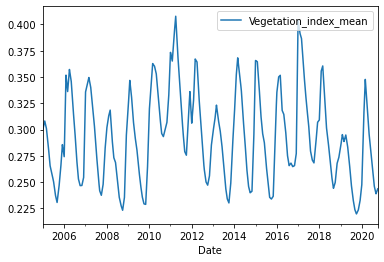

In [25]:
vegetation.plot()

In [26]:
dummy = pd.DataFrame(index = pd.date_range(start = '2020-10-02', end = '2020-10-31'))
vegetation_pivot = pd.concat([vegetation, dummy], axis = 0)
vegetation_pivot

,Vegetation_index_mean
2005-01-01,0.300478
2005-01-02,0.300725
2005-01-03,0.300971
2005-01-04,0.301218
2005-01-05,0.301464
...,...
2020-10-27,NaN
2020-10-28,NaN
2020-10-29,NaN
2020-10-30,NaN


In [27]:
vegetation_pivot.fillna(method='ffill', inplace=True)
vegetation_pivot

,Vegetation_index_mean
2005-01-01,0.300478
2005-01-02,0.300725
2005-01-03,0.300971
2005-01-04,0.301218
2005-01-05,0.301464
...,...
2020-10-27,0.243616
2020-10-28,0.243616
2020-10-29,0.243616
2020-10-30,0.243616


In [28]:
_queens_log['vegetation'] = vegetation_pivot['Vegetation_index_mean']

In [29]:
# _queens_log.plot(subplots=True, figsize=(14,10))

In [30]:
_queens_copy = _queens_log.copy(deep=True)

In [31]:
_queens_copy.reset_index(inplace=True)
_queens_copy

,Date,NT,min_Precipitation,min_RelativeHumidity,min_SoilWaterContent,min_SolarRadiation,min_Temperature,min_WindSpeed,max_Precipitation,max_RelativeHumidity,...,mean_WindSpeed,variance_Precipitation,variance_RelativeHumidity,variance_SoilWaterContent,variance_SolarRadiation,variance_Temperature,variance_WindSpeed,year_sin,year_cos,vegetation
0,2005-01-01,1.598377,0.0,14.558820,0.000000e+00,2.518120,24.179960,1.840394,315.266815,95.683342,...,5.296892,546.059262,584.201131,0.026743,58.942658,12.920252,1.930014,0.012400,0.999923,0.300478
1,2005-01-02,0.277632,0.0,24.545588,5.487818e-07,3.624103,24.460094,2.422856,89.898376,93.291039,...,4.912403,179.241423,350.439419,0.022078,34.117853,7.575619,1.750100,0.029599,0.999562,0.300725
2,2005-01-03,4.485711,0.0,26.324978,0.000000e+00,2.609383,22.853350,2.325922,191.626007,95.732391,...,4.397652,453.466574,194.818209,0.016960,39.498822,3.281991,0.947886,0.046789,0.998905,0.300971
3,2005-01-04,0.000000,0.0,17.972591,4.041164e-07,5.795825,21.169226,2.570683,80.071053,93.612312,...,4.789952,241.526326,511.059176,0.017502,65.400820,4.244213,0.979937,0.063965,0.997952,0.301218
4,2005-01-05,0.000000,0.0,12.375551,8.472707e-07,5.025146,19.282555,0.945213,95.759972,89.346535,...,4.574771,65.908866,533.554030,0.019724,65.321537,5.586288,1.623544,0.081122,0.996704,0.301464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,2020-10-27,2.545531,0.0,14.552748,2.327530e-07,17.342916,18.360123,0.905769,20.242748,81.196068,...,2.927383,3.060416,419.901783,0.007255,11.117159,7.883428,0.810156,-0.900812,0.434210,0.243616
5779,2020-10-28,4.976669,0.0,9.955595,0.000000e+00,20.547968,20.724829,1.005318,25.762955,83.170822,...,2.925449,4.106785,393.056282,0.006257,8.258142,5.567216,0.583602,-0.893209,0.449641,0.243616
5780,2020-10-29,3.978977,0.0,9.798850,0.000000e+00,21.640631,22.928164,1.234412,6.900141,78.015366,...,3.588450,0.189806,255.497621,0.005354,3.305882,2.940298,2.085181,-0.885342,0.464940,0.243616
5781,2020-10-30,5.143564,0.0,10.158679,0.000000e+00,21.662573,18.294643,1.224854,3.455588,77.691147,...,3.789468,0.023468,223.787162,0.004703,1.961698,17.479871,1.896523,-0.877214,0.480100,0.243616


In [32]:
for i in _queens_copy.columns:
    _queens_copy[i].fillna(method='ffill', inplace=True)

In [33]:
_queens_copy.rename(columns = {'NT':'QL'}, inplace=True)

In [34]:
# train_df = _queens_copy.loc[_queens_copy['Date'] <='2018-10-31'].copy(deep=True)
# val_df = _queens_copy.loc[(_queens_copy['Date'] >= '2018-11-01') & (_queens_copy['Date'] <= '2019-10-31')].copy(deep=True)
# test_df = _queens_copy.loc[(_queens_copy['Date'] >= '2019-11-01') & (_queens_copy['Date'] <= '2020-02-29')].copy(deep=True)

n = len(_queens_copy)


train_df = _queens_copy[0:int(n*0.7)].copy(deep=True)
val_df = _queens_copy[int(n*0.7): int(n*0.9)].copy(deep=True)
test_df = _queens_copy[int(n*0.90):].copy(deep=True)

In [35]:
train_df.drop(columns=['Date'], inplace=True)
val_df.drop(columns=['Date'], inplace=True)
test_df.drop(columns=['Date'], inplace=True)

In [36]:
train_df = (train_df - train_df.mean()) / train_df.std()
val_df = (val_df - train_df.mean()) / train_df.std()
test_df = (test_df - train_df.mean()) / train_df.std()

In [37]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                train_df = train_df, val_df = val_df, test_df = test_df,
                label_columns = None):
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}
        
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
    
        
    def __repr__(self):
        return '\n'.join([
            'Total window size: {}'.format(self.total_window_size),
            'Total indices: {}'.format(self.input_indices),
            'Label indices: {}'.format(self.label_indices),
            'Label column name(s): {}'.format(self.label_columns)
        ])
    
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns],
                              axis = -1)
            
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        
        return inputs, labels
    
    def plot(self, model=None, plot_col = 'QL', max_subplots = 3):
        inputs, labels = self.example
        plt.figure(figsize=(12,8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                    label = 'Inputs', marker='.', zorder = -10)
            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index
            
            if label_col_index is None:
                continue
            
            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                       edgecolors='k', label='Labels', c= '#2ca02c', s= 64)
            
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                           marker = 'X', edgecolors = 'k', label = 'Predictions',
                           c = '#ff7f0e', s = 64)
                
            if n == 0:
                plt.legend()
        plt.xlabel('Time [D]')
        
        
        
    def make_dataset(self, data):
        data = np.array(data, dtype = np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(data = data,
                                                                 targets = None,
                                                                 sequence_length = self.total_window_size,
                                                                 sequence_stride = 1,
                                                                 shuffle = True,
                                                                 batch_size = 256,)
        ds = ds.map(self.split_window)

        return ds
        
        
        
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        result = getattr(self, '_example', None)
        if result is None:
            result = next(iter(self.train))
            self._example = result

        return result
        
        

In [38]:
w1 = WindowGenerator(input_width = 24, label_width = 1, shift = 24,
                    label_columns = ['QL'])
w1

Total window size: 48
Total indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['QL']

In [39]:
w2 = WindowGenerator(input_width = 6, label_width = 1, shift = 1,
                    label_columns = ['QL'])
w2

Total window size: 7
Total indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['QL']

In [40]:
import tensorflow as tf

In [41]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                          np.array(train_df[100:100+w2.total_window_size]),
                          np.array(train_df[200:200+w2.total_window_size])])

In [42]:
example_inputs, example_labels = w2.split_window(example_window)

In [43]:
single_step_window = WindowGenerator(input_width = 1, label_width = 1, shift= 1,
                                    label_columns = ['QL'])
single_step_window

Total window size: 2
Total indices: [0]
Label indices: [1]
Label column name(s): ['QL']

In [44]:
column_indices = {name:i for i, name in enumerate(_queens_copy.columns)}

In [45]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index = None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [46]:
baseline = Baseline(label_index = column_indices['QL'])


In [47]:
baseline.compile(loss = tf.losses.MeanSquaredError(),
                metrics = [tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose = 0)

5/5 [==============================] - 0s 3ms/step - loss: 20.6114 - mean_absolute_error: 4.0636


In [48]:
wide_window = WindowGenerator(input_width=24, label_width=24, shift = 1,
                             label_columns = ['QL'])

wide_window

Total window size: 25
Total indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['QL']

In [49]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [50]:
print('Input shape: {}'.format(single_step_window.example[0].shape))
print('Output shape: {}'.format(linear(single_step_window.example[0]).shape))

Input shape: (256, 1, 28)
Output shape: (256, 1, 1)


In [51]:
import keras

In [52]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(clipnorm=1),
                metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

In [53]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
16/16 [==============================] - 0s 31ms/step - loss: 1.9900 - mean_absolute_error: 1.1197 - val_loss: 3582.5725 - val_mean_absolute_error: 50.5044
Epoch 2/100
16/16 [==============================] - 0s 23ms/step - loss: 1.6832 - mean_absolute_error: 1.0256 - val_loss: 3126.8369 - val_mean_absolute_error: 47.1176
Epoch 3/100
16/16 [==============================] - 0s 20ms/step - loss: 1.4375 - mean_absolute_error: 0.9421 - val_loss: 2623.3025 - val_mean_absolute_error: 43.0023
Epoch 4/100
16/16 [==============================] - 0s 21ms/step - loss: 1.2386 - mean_absolute_error: 0.8689 - val_loss: 2055.9104 - val_mean_absolute_error: 37.8656
Epoch 5/100
16/16 [==============================] - 0s 18ms/step - loss: 1.0853 - mean_absolute_error: 0.8076 - val_loss: 1541.2037 - val_mean_absolute_error: 32.5293
Epoch 6/100
16/16 [==============================] - 0s 22ms/step - loss: 0.9609 - mean_absolute_error: 0.7544 - val_loss: 1057.1427 - val_mean_absolute_error: 

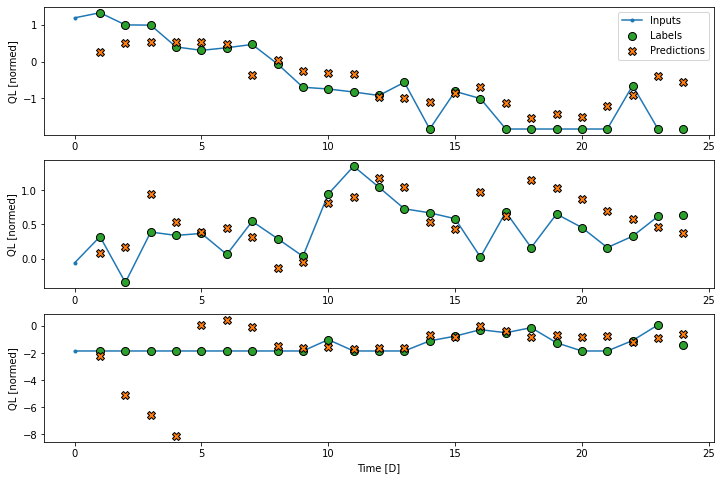

In [54]:
wide_window.plot(linear)

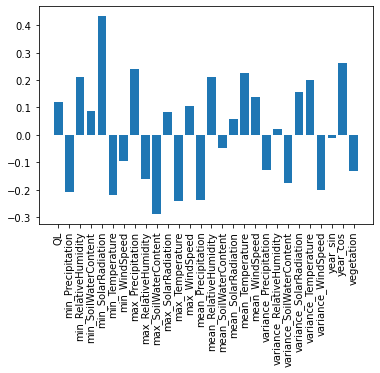

In [55]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [56]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64, activation='relu'),
    tf.keras.layers.Dense(units = 64, activation = 'relu'),
    tf.keras.layers.Dense(units = 1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
16/16 [==============================] - 1s 40ms/step - loss: 0.5029 - mean_absolute_error: 0.5558 - val_loss: 588.1506 - val_mean_absolute_error: 22.9574
Epoch 2/100
16/16 [==============================] - 0s 26ms/step - loss: 0.2560 - mean_absolute_error: 0.3919 - val_loss: 372.8920 - val_mean_absolute_error: 18.1968
Epoch 3/100
16/16 [==============================] - 0s 22ms/step - loss: 0.2100 - mean_absolute_error: 0.3505 - val_loss: 264.4799 - val_mean_absolute_error: 14.4845
Epoch 4/100
16/16 [==============================] - 0s 24ms/step - loss: 0.1907 - mean_absolute_error: 0.3314 - val_loss: 128.3768 - val_mean_absolute_error: 9.2357
Epoch 5/100
16/16 [==============================] - 0s 26ms/step - loss: 0.1795 - mean_absolute_error: 0.3192 - val_loss: 73.4435 - val_mean_absolute_error: 5.2983
Epoch 6/100
16/16 [==============================] - 0s 23ms/step - loss: 0.1746 - mean_absolute_error: 0.3151 - val_loss: 66.7251 - val_mean_absolute_error: 4.8657
Epo

In [57]:
performance

{'Baseline': [18.530752182006836, 3.8501338958740234],
 'Linear': [148.36245727539062, 9.874412536621094],
 'Dense': [61.62089920043945, 6.519105911254883]}

In [58]:
conv_width = 3
conv_window = WindowGenerator(input_width = conv_width, label_width = 1, shift = 1,
                             label_columns = ['QL'])
conv_window

Total window size: 4
Total indices: [0 1 2]
Label indices: [3]
Label column name(s): ['QL']

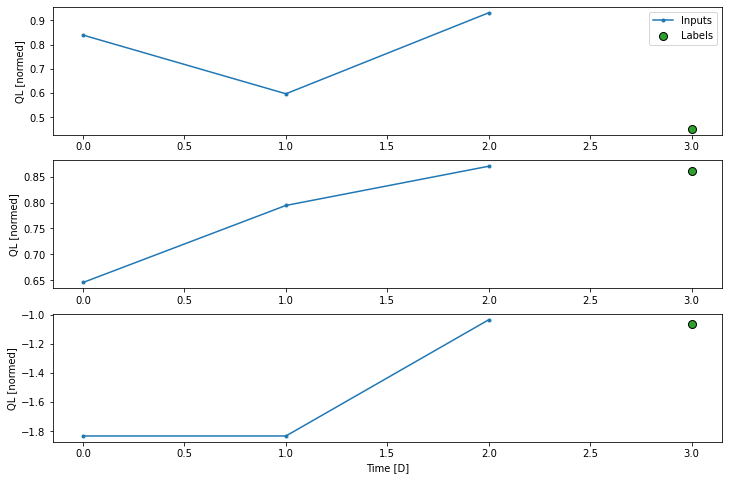

In [59]:
conv_window.plot()

In [60]:
multi_step_dense = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation = 'relu'),
    tf.keras.layers.Dense(units=32, activation = 'relu'),
    tf.keras.layers.Dense(units=1),
    tf.keras.layers.Reshape([1, - 1])
])

In [61]:
print('Input shape: {}'.format(conv_window.example[0].shape))
print('Output shape: {}'.format(multi_step_dense(conv_window.example[0]).shape))

Input shape: (256, 3, 28)
Output shape: (256, 1, 1)


In [62]:
history = compile_and_fit(multi_step_dense, conv_window)

val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

Epoch 1/100
16/16 [==============================] - 0s 29ms/step - loss: 0.6077 - mean_absolute_error: 0.5806 - val_loss: 1310.7227 - val_mean_absolute_error: 34.4568
Epoch 2/100
16/16 [==============================] - 0s 22ms/step - loss: 0.3184 - mean_absolute_error: 0.4284 - val_loss: 1047.7631 - val_mean_absolute_error: 30.7720
Epoch 3/100
16/16 [==============================] - 0s 20ms/step - loss: 0.2479 - mean_absolute_error: 0.3802 - val_loss: 1309.8694 - val_mean_absolute_error: 34.3305
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 1375.1635 - mean_absolute_error: 35.0793


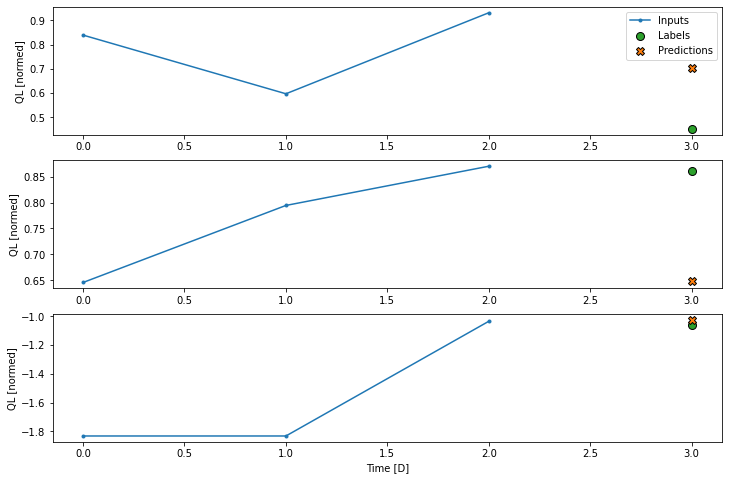

In [63]:
conv_window.plot(multi_step_dense)

In [64]:
print('Input shape: {}'.format(wide_window.example[0].shape))
try:
    print('Output shape: {}'.format(multi_step_dense(wide_window.example[0]).shape))
except Exception as e:
    print(f'\n{type(e).__name__}:{e}')

Input shape: (256, 24, 28)

InvalidArgumentError:Matrix size-incompatible: In[0]: [256,672], In[1]: [84,32] [Op:MatMul]


In [65]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters = 32,
                          kernel_size=(conv_width,),
                          activation = 'relu'),
    tf.keras.layers.Dense(units=32, activation = 'relu'),
    tf.keras.layers.Dense(units=1),
])

In [66]:
print('Conv model on conv_window')
print('Input shape: {}'.format(conv_window.example[0].shape))
print('Output shape: {}'.format(conv_model(conv_window.example[0]).shape))

Conv model on conv_window
Input shape: (256, 3, 28)
Output shape: (256, 1, 1)


In [67]:
history = compile_and_fit(conv_model, conv_window)

val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

Epoch 1/100
16/16 [==============================] - 1s 43ms/step - loss: 0.8539 - mean_absolute_error: 0.6860 - val_loss: 2002.5944 - val_mean_absolute_error: 35.7748
Epoch 2/100
16/16 [==============================] - 0s 25ms/step - loss: 0.3348 - mean_absolute_error: 0.4436 - val_loss: 877.3202 - val_mean_absolute_error: 22.4407
Epoch 3/100
16/16 [==============================] - 0s 26ms/step - loss: 0.2545 - mean_absolute_error: 0.3890 - val_loss: 572.8337 - val_mean_absolute_error: 17.6828
Epoch 4/100
16/16 [==============================] - 0s 25ms/step - loss: 0.2214 - mean_absolute_error: 0.3602 - val_loss: 497.9590 - val_mean_absolute_error: 16.1604
Epoch 5/100
16/16 [==============================] - 0s 25ms/step - loss: 0.2017 - mean_absolute_error: 0.3402 - val_loss: 374.7008 - val_mean_absolute_error: 13.5721
Epoch 6/100
16/16 [==============================] - 0s 25ms/step - loss: 0.1881 - mean_absolute_error: 0.3270 - val_loss: 267.2557 - val_mean_absolute_error: 11.41

In [68]:
performance

{'Baseline': [18.530752182006836, 3.8501338958740234],
 'Linear': [148.36245727539062, 9.874412536621094],
 'Dense': [61.62089920043945, 6.519105911254883],
 'Multi step dense': [1044.8443603515625, 30.87656593322754],
 'Conv': [171.5830078125, 11.15877914428711]}

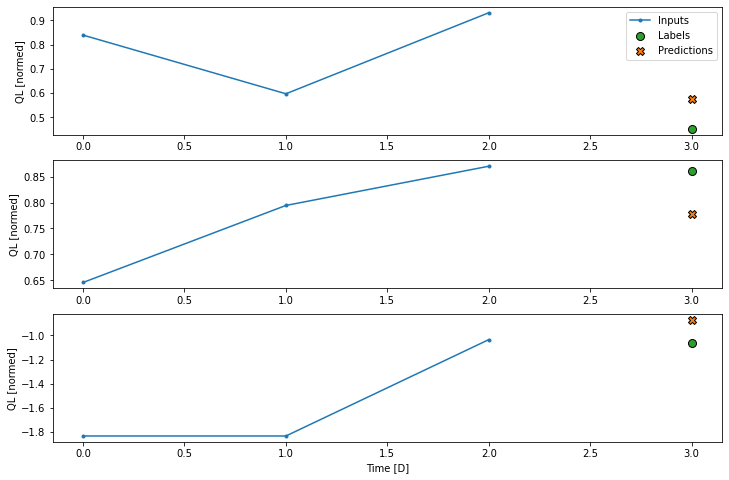

In [69]:
conv_window.plot(conv_model)

In [70]:
print('Wide window')
print('Input shape: {}'.format(wide_window.example[0].shape))
print('Labels shape: {}'.format(wide_window.example[1].shape))
print('Output shape: {}'.format(conv_model(wide_window.example[0]).shape))

Wide window
Input shape: (256, 24, 28)
Labels shape: (256, 24, 1)
Output shape: (256, 22, 1)


In [71]:
label_width = 24
input_width = label_width + (conv_width - 1)
wide_conv_window = WindowGenerator(input_width = input_width,
                                  label_width = label_width,
                                  shift = 1,
                                  label_columns = ['QL'])
wide_conv_window

Total window size: 27
Total indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['QL']

In [72]:
print('Wide window')
print('Input shape: {}'.format(wide_conv_window.example[0].shape))
print('Labels shape: {}'.format(wide_conv_window.example[1].shape))
print('Output shape: {}'.format(conv_model(wide_conv_window.example[0]).shape))

Wide window
Input shape: (256, 26, 28)
Labels shape: (256, 24, 1)
Output shape: (256, 24, 1)


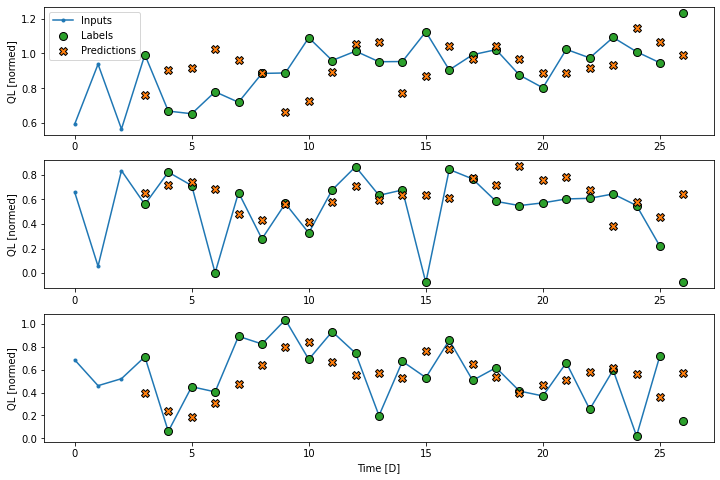

In [73]:
wide_conv_window.plot(conv_model)

In [74]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units=1)
])

In [75]:
print('Input shape: {}'.format(wide_window.example[0].shape))
print('Output shape: {}'.format(lstm_model(wide_window.example[0]).shape))

Input shape: (256, 24, 28)
Output shape: (256, 24, 1)


In [76]:
history = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose = 0)

Epoch 1/100
16/16 [==============================] - 1s 78ms/step - loss: 0.5566 - mean_absolute_error: 0.5858 - val_loss: 23.4195 - val_mean_absolute_error: 4.4252
Epoch 2/100
16/16 [==============================] - 0s 30ms/step - loss: 0.3172 - mean_absolute_error: 0.4308 - val_loss: 20.5524 - val_mean_absolute_error: 4.1218
Epoch 3/100
16/16 [==============================] - 0s 30ms/step - loss: 0.2647 - mean_absolute_error: 0.3966 - val_loss: 20.5650 - val_mean_absolute_error: 4.1244
Epoch 4/100
16/16 [==============================] - 1s 33ms/step - loss: 0.2325 - mean_absolute_error: 0.3679 - val_loss: 20.1358 - val_mean_absolute_error: 4.0789
Epoch 5/100
16/16 [==============================] - 0s 29ms/step - loss: 0.2115 - mean_absolute_error: 0.3493 - val_loss: 20.3477 - val_mean_absolute_error: 4.1076
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 20.6893 - mean_absolute_error: 4.1495


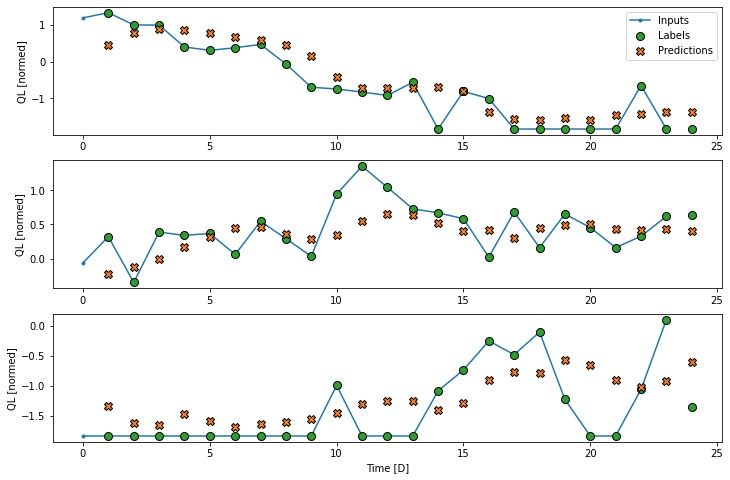

In [77]:
wide_window.plot(lstm_model)

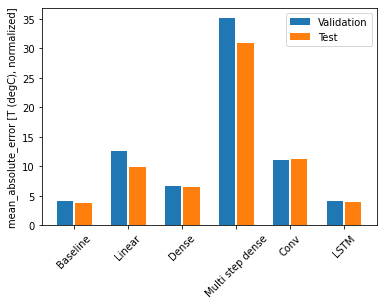

In [78]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [79]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 3.8501
Linear      : 9.8744
Dense       : 6.5191
Multi step dense: 30.8766
Conv        : 11.1588
LSTM        : 3.8885


In [80]:
single_step_window = WindowGenerator(input_width = 1, label_width = 1, shift=1)
wide_window = WindowGenerator(input_width = 24, label_width = 24, shift = 1)

for example_inputs, example_labels in wide_window.train.take(1):
    print('Inputs shape (batch, time, features): {}'.format(example_labels.shape))
    print('Labels shape (batch, time, features): {}'.format(example_labels.shape))

Inputs shape (batch, time, features): (256, 24, 28)
Labels shape (batch, time, features): (256, 24, 28)


In [81]:
baseline = Baseline()
baseline.compile(loss = tf.losses.MeanSquaredError(),
                metrics = [tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

5/5 [==============================] - 0s 4ms/step - loss: 326.3017 - mean_absolute_error: 4.0231


In [82]:
num_features = train_df.shape[1]

In [83]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64, activation = 'relu'),
    tf.keras.layers.Dense(units = 64, activation = 'relu'),
    tf.keras.layers.Dense(units = num_features)
])

In [84]:
history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose = 0)


Epoch 1/100
16/16 [==============================] - 1s 39ms/step - loss: 1.0593 - mean_absolute_error: 0.7756 - val_loss: 4701.6123 - val_mean_absolute_error: 28.7958
Epoch 2/100
16/16 [==============================] - 0s 25ms/step - loss: 0.7277 - mean_absolute_error: 0.6459 - val_loss: 4630.1152 - val_mean_absolute_error: 31.7730
Epoch 3/100
16/16 [==============================] - 0s 25ms/step - loss: 0.5276 - mean_absolute_error: 0.5286 - val_loss: 4425.2588 - val_mean_absolute_error: 33.7048
Epoch 4/100
16/16 [==============================] - 0s 25ms/step - loss: 0.4209 - mean_absolute_error: 0.4507 - val_loss: 4015.0269 - val_mean_absolute_error: 32.6547
Epoch 5/100
16/16 [==============================] - 0s 25ms/step - loss: 0.3717 - mean_absolute_error: 0.4114 - val_loss: 3776.6953 - val_mean_absolute_error: 31.4742
Epoch 6/100
16/16 [==============================] - 0s 25ms/step - loss: 0.3437 - mean_absolute_error: 0.3894 - val_loss: 3616.5166 - val_mean_absolute_error: 

In [85]:
wide_window = WindowGenerator(input_width=24, label_width = 24, shift = 1)
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units = num_features)
])

history = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/100
16/16 [==============================] - 1s 74ms/step - loss: 0.9665 - mean_absolute_error: 0.7424 - val_loss: 4394.5488 - val_mean_absolute_error: 23.2885
Epoch 2/100
16/16 [==============================] - 0s 28ms/step - loss: 0.7848 - mean_absolute_error: 0.6546 - val_loss: 4389.6567 - val_mean_absolute_error: 23.2943
Epoch 3/100
16/16 [==============================] - 0s 26ms/step - loss: 0.6584 - mean_absolute_error: 0.5831 - val_loss: 4378.8467 - val_mean_absolute_error: 23.2535
Epoch 4/100
16/16 [==============================] - 0s 29ms/step - loss: 0.5725 - mean_absolute_error: 0.5306 - val_loss: 4372.2280 - val_mean_absolute_error: 23.2158
Epoch 5/100
16/16 [==============================] - 0s 28ms/step - loss: 0.5147 - mean_absolute_error: 0.4934 - val_loss: 4370.1230 - val_mean_absolute_error: 23.2016
Epoch 6/100
16/16 [==============================] - 0s 30ms/step - loss: 0.4751 - mean_absolute_error: 0.4661 - val_loss: 4368.4858 - val_mean_absolute_error: 

In [86]:
class ResidualWrapper(tf.keras.Model):
    def __init__(self, model):
        super().__init__()
        self.model = model
    
    def call(self, inputs, *args, **kwargs):
        delta = self.model(inputs, *args, **kwargs)
        
        
        return inputs + delta

In [87]:
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
        tf.keras.layers.LSTM(32, return_sequences=True),
        tf.keras.layers.Dense(
        num_features, kernel_initializer=tf.initializers.zeros)
    ]))

history = compile_and_fit(residual_lstm, wide_window)

val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose = 0)

Epoch 1/100
16/16 [==============================] - 1s 77ms/step - loss: 0.3342 - mean_absolute_error: 0.2891 - val_loss: 326.2778 - val_mean_absolute_error: 4.0273
Epoch 2/100
16/16 [==============================] - 0s 29ms/step - loss: 0.3271 - mean_absolute_error: 0.2869 - val_loss: 326.2574 - val_mean_absolute_error: 4.0318
Epoch 3/100
16/16 [==============================] - 0s 29ms/step - loss: 0.3191 - mean_absolute_error: 0.2846 - val_loss: 326.2000 - val_mean_absolute_error: 4.0365
Epoch 4/100
16/16 [==============================] - 0s 30ms/step - loss: 0.3109 - mean_absolute_error: 0.2824 - val_loss: 326.1525 - val_mean_absolute_error: 4.0422
Epoch 5/100
16/16 [==============================] - 0s 31ms/step - loss: 0.3027 - mean_absolute_error: 0.2802 - val_loss: 326.1124 - val_mean_absolute_error: 4.0485
Epoch 6/100
16/16 [==============================] - 0s 30ms/step - loss: 0.2942 - mean_absolute_error: 0.2782 - val_loss: 326.0388 - val_mean_absolute_error: 4.0576
Epoc

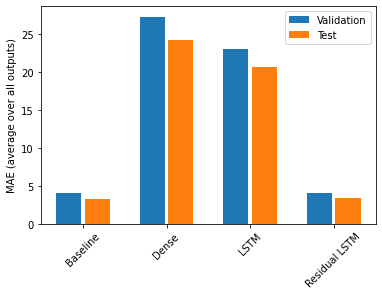

In [88]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [89]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 3.2900
Dense          : 24.3186
LSTM           : 20.6809
Residual LSTM  : 3.3510


Total window size: 246
Total indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122]
Label indices: [123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 

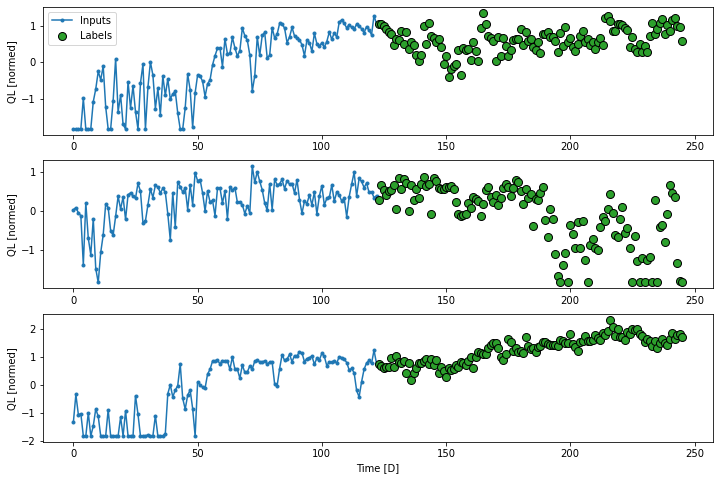

In [90]:
out_steps = 123
multi_window = WindowGenerator(input_width = 123,
                              label_width = out_steps,
                              shift = out_steps)
multi_window.plot()
multi_window

In [91]:
multi_window

Total window size: 246
Total indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122]
Label indices: [123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 

4/4 [==============================] - 0s 10ms/step - loss: 1945.5774 - mean_absolute_error: 10.7564


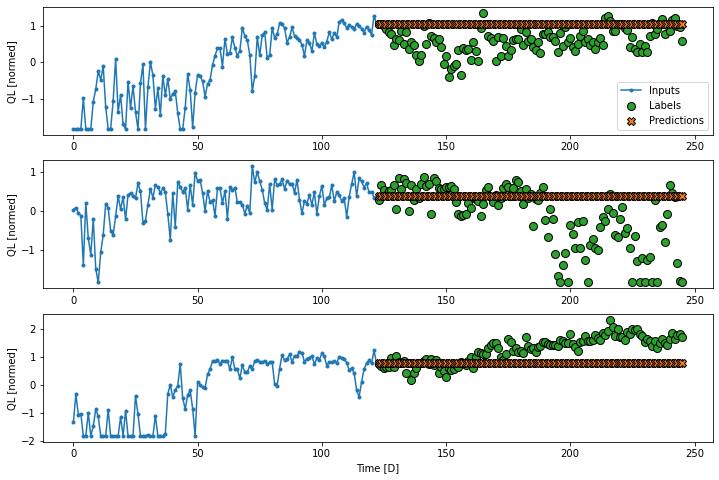

In [92]:
class MultiStepLastBaseline(tf.keras.Model):
    def call(self, inputs):
        return tf.tile(inputs[:, -1:, :], [1, out_steps, 1])
    
last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                     metrics = [tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)

multi_window.plot(last_baseline)

In [93]:
last_baseline.evaluate(multi_window.test, verbose=0)

[1949.8809814453125, 10.22490406036377]

In [94]:
multi_window.test

<MapDataset shapes: ((None, 123, 28), (None, 123, 28)), types: (tf.float32, tf.float32)>

4/4 [==============================] - 0s 10ms/step - loss: 2603.4617 - mean_absolute_error: 13.4556


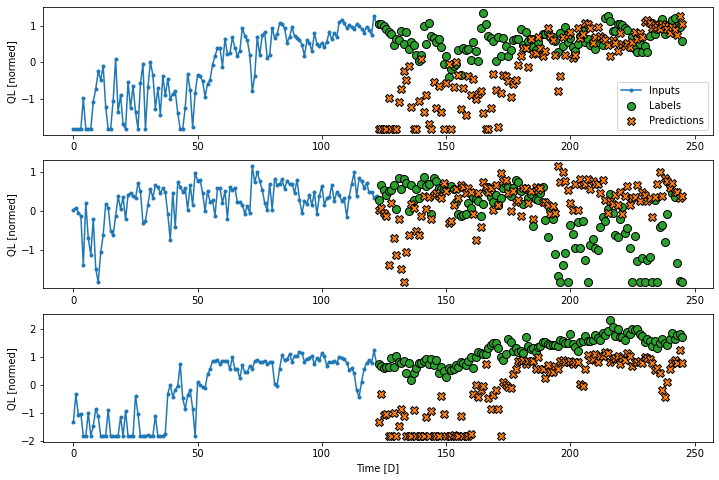

In [95]:
class RepeatBaseline(tf.keras.Model):
    def call(self, inputs):
        return inputs
    
repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                       metrics = [tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

In [96]:
multi_performance

{'Last': [1949.8809814453125, 10.22490406036377],
 'Repeat': [2613.730712890625, 12.938100814819336]}

In [97]:
multi_window.test

<MapDataset shapes: ((None, 123, 28), (None, 123, 28)), types: (tf.float32, tf.float32)>

Epoch 1/100
15/15 [==============================] - 1s 71ms/step - loss: 0.9255 - mean_absolute_error: 0.7295 - val_loss: 4394.0435 - val_mean_absolute_error: 25.0524
Epoch 2/100
15/15 [==============================] - 1s 52ms/step - loss: 0.8144 - mean_absolute_error: 0.6713 - val_loss: 4377.0728 - val_mean_absolute_error: 26.6685
Epoch 3/100
15/15 [==============================] - 1s 36ms/step - loss: 0.7505 - mean_absolute_error: 0.6333 - val_loss: 4398.1997 - val_mean_absolute_error: 27.7880
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 4432.7412 - mean_absolute_error: 28.4674


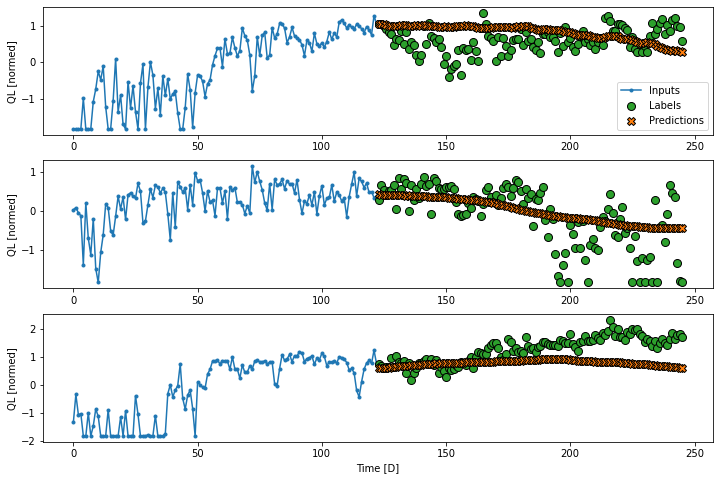

In [98]:
multi_linear_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    tf.keras.layers.Dense(out_steps * num_features,
                         kernel_initializer = tf.initializers.zeros),
    tf.keras.layers.Reshape([out_steps, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)


In [99]:
multi_performance

{'Last': [1949.8809814453125, 10.22490406036377],
 'Repeat': [2613.730712890625, 12.938100814819336],
 'Linear': [4271.88037109375, 28.278419494628906]}

Epoch 1/100
15/15 [==============================] - 1s 58ms/step - loss: 0.8035 - mean_absolute_error: 0.6591 - val_loss: 4406.1763 - val_mean_absolute_error: 28.5568
Epoch 2/100
15/15 [==============================] - 1s 42ms/step - loss: 0.6187 - mean_absolute_error: 0.5406 - val_loss: 4539.1279 - val_mean_absolute_error: 27.8629
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 4797.0815 - mean_absolute_error: 30.3253


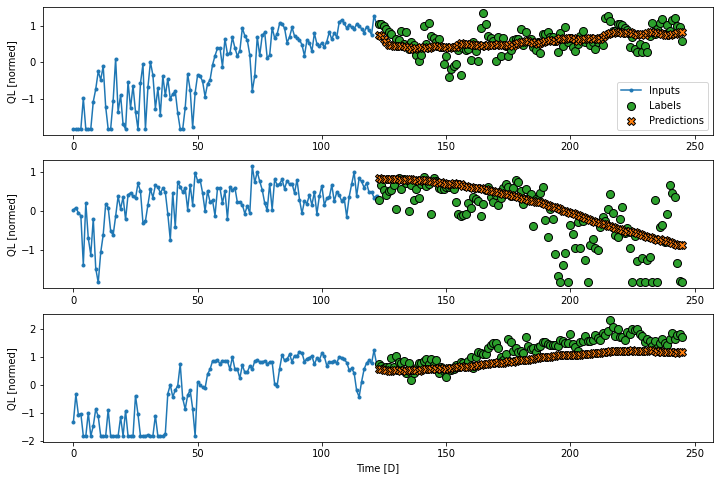

In [100]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(out_steps * num_features,
                          kernel_initializer = tf.initializers.zeros),
    tf.keras.layers.Reshape([out_steps, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

Epoch 1/100
15/15 [==============================] - 1s 83ms/step - loss: 0.9728 - mean_absolute_error: 0.7522 - val_loss: 4490.6245 - val_mean_absolute_error: 23.4398
Epoch 2/100
15/15 [==============================] - 1s 37ms/step - loss: 0.8292 - mean_absolute_error: 0.6784 - val_loss: 4483.5483 - val_mean_absolute_error: 23.4423
Epoch 3/100
15/15 [==============================] - 1s 37ms/step - loss: 0.6854 - mean_absolute_error: 0.5933 - val_loss: 4496.1230 - val_mean_absolute_error: 23.5251
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 4501.5132 - mean_absolute_error: 23.5927


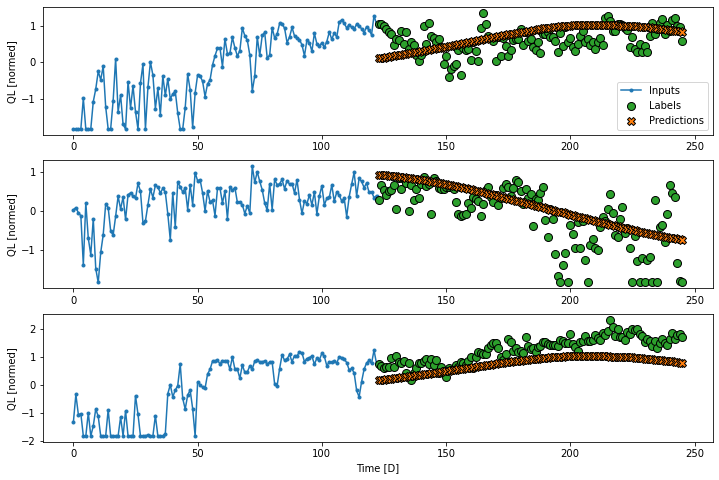

In [101]:
conv_width = 3
multi_conv_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -conv_width:, :]),
    tf.keras.layers.Conv1D(256, activation = 'relu', kernel_size=(conv_width)),
    tf.keras.layers.LSTM(32, return_sequences = False),

    tf.keras.layers.Dense(out_steps * num_features,
                         kernel_initializer = tf.initializers.zeros),
#     tf.keras.layers.Dense(123,
#                          kernel_initializer = tf.initializers.zeros),
    tf.keras.layers.Reshape([out_steps, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

In [102]:
train_df

,QL,min_Precipitation,min_RelativeHumidity,min_SoilWaterContent,min_SolarRadiation,min_Temperature,min_WindSpeed,max_Precipitation,max_RelativeHumidity,max_SoilWaterContent,...,mean_WindSpeed,variance_Precipitation,variance_RelativeHumidity,variance_SoilWaterContent,variance_SolarRadiation,variance_Temperature,variance_WindSpeed,year_sin,year_cos,vegetation
0,-1.112321,-0.048814,-0.720420,-0.664344,-1.816149,0.848807,0.596945,6.690456,1.915276,1.313621,...,1.611883,5.155347,1.919041,3.547554,3.527017,0.609427,0.633192,0.014555,1.399630,0.124176
1,-1.707180,-0.048814,0.375610,-0.107711,-1.622204,0.893702,1.574094,1.490227,1.518745,1.368765,...,1.162855,1.493198,0.498248,2.692969,1.715624,-0.137237,0.439990,0.038950,1.399121,0.130043
2,0.188125,-0.048814,0.570895,-0.664344,-1.800145,0.636203,1.411475,3.837525,1.923406,1.301646,...,0.561701,4.230942,-0.447610,1.755474,2.108257,-0.737072,-0.421477,0.063333,1.398195,0.135910
3,-1.832225,-0.048814,-0.345764,-0.254446,-1.241371,0.366303,1.822092,1.263468,1.571997,1.241576,...,1.019851,2.115024,1.474488,1.854774,3.998250,-0.602646,-0.387059,0.087695,1.396852,0.141777
4,-1.832225,-0.048814,-0.960029,0.195049,-1.376517,0.063942,-0.904827,1.625479,0.864933,1.466078,...,0.768551,0.361736,1.611210,2.261771,3.992465,-0.415154,0.304086,0.112031,1.395092,0.147644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,-0.702459,-0.048814,-0.253745,0.559131,0.301002,0.833191,-0.149628,-0.021887,0.010813,1.000306,...,-0.701823,-0.076760,0.732435,0.880123,0.145805,-0.574708,-0.729162,0.611612,1.260498,1.242138
4044,-1.477106,-0.048814,0.078813,-0.664344,-1.208950,0.899691,-0.151332,0.933892,0.488879,1.007925,...,-0.645566,0.462210,0.836556,0.922561,0.243952,-0.575008,0.085620,0.633510,1.249801,1.254028
4045,-1.832225,-0.048814,0.421036,0.860867,-0.138273,0.809549,-1.030898,0.330395,0.206358,1.143196,...,-0.882648,0.281012,0.907466,1.189524,0.429219,-0.734070,-0.147462,0.655220,1.238732,1.265918
4046,-1.832225,-0.048814,0.102212,-0.664344,-1.357864,0.958156,0.065848,2.615653,0.785421,1.343713,...,-1.104878,1.062128,1.281489,1.707763,1.651947,-0.893548,-0.811226,0.676736,1.227292,1.277808


Epoch 1/100
15/15 [==============================] - 2s 108ms/step - loss: 0.9542 - mean_absolute_error: 0.7433 - val_loss: 4493.6387 - val_mean_absolute_error: 23.4577
Epoch 2/100
15/15 [==============================] - 1s 52ms/step - loss: 0.8467 - mean_absolute_error: 0.6888 - val_loss: 4493.9658 - val_mean_absolute_error: 23.4625
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 4495.8809 - mean_absolute_error: 23.4851


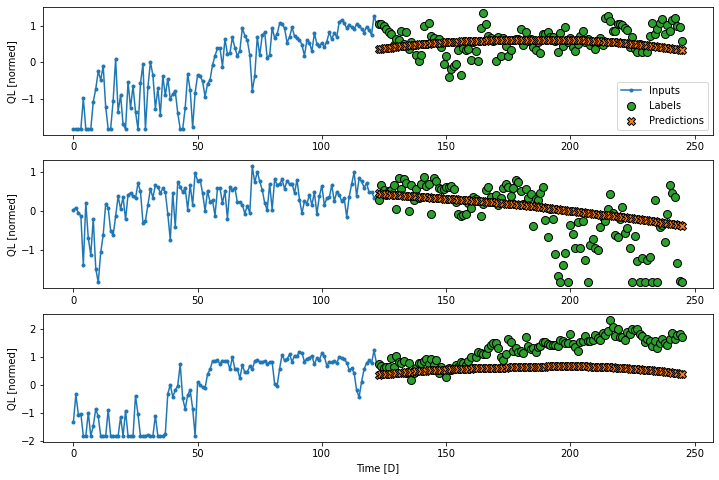

In [103]:
multi_lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences = False),
    tf.keras.layers.Dense(out_steps * num_features,
                         kernel_initializer = tf.initializers.zeros),
    tf.keras.layers.Reshape([out_steps, num_features])
])


history = compile_and_fit(multi_lstm_model, multi_window)

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose = 0)
multi_window.plot(multi_lstm_model)

In [104]:
class FeedBack(tf.keras.Model):
    def __init__(self, units, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state = True)
        self.dense = tf.keras.layers.Dense(num_features)
        
        
    def warmup(self, inputs):
        x, *state = self.lstm_rnn(inputs)
        
        prediction = self.dense(x)
        return prediction, state
    
    
    def call(self, inputs, training=None):
        predictions = []

        prediction, state = self.warmup(inputs)

        predictions.append(prediction)
        for n in range(1, self.out_steps):
            x = prediction
            x, state = self.lstm_cell(x, states= state,
                                     training = training)
            prediction = self.dense(x)
            predictions.append(prediction)

        predictions = tf.stack(predictions)

        predictions = tf.transpose(predictions, [1, 0 ,2])

        return predictions

In [105]:
feedback_model = FeedBack(units=32, out_steps = out_steps)



In [106]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([256, 28])

In [107]:
print('Output shape (batch, time features): {}'.format(feedback_model(multi_window.example[0]).shape))

Output shape (batch, time features): (256, 123, 28)


Epoch 1/100
15/15 [==============================] - 14s 934ms/step - loss: 0.9780 - mean_absolute_error: 0.7543 - val_loss: 4494.8911 - val_mean_absolute_error: 23.4944
Epoch 2/100
15/15 [==============================] - 9s 615ms/step - loss: 0.8744 - mean_absolute_error: 0.7012 - val_loss: 4497.7661 - val_mean_absolute_error: 23.5525
Epoch 3/100
4/4 [==============================] - 0s 94ms/step - loss: 4505.6777 - mean_absolute_error: 23.6067


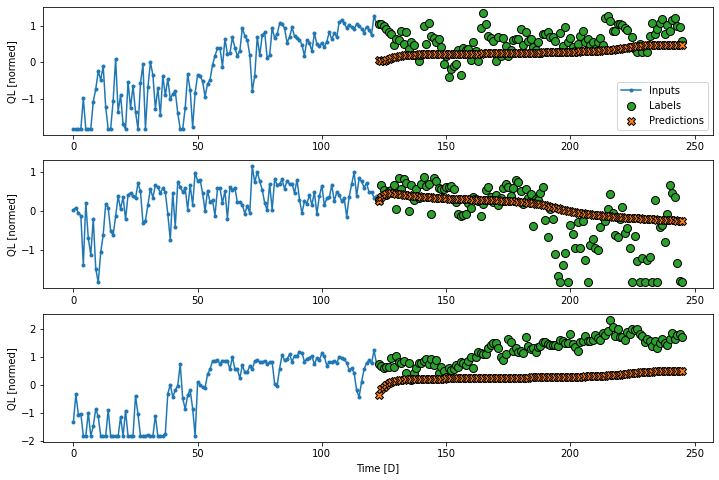

In [108]:
history = compile_and_fit(feedback_model, multi_window)

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)




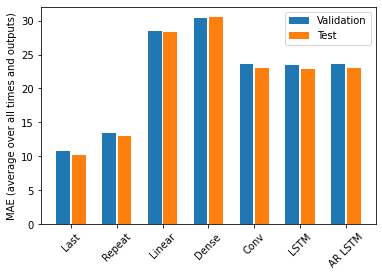

In [109]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()